In [3]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv(r'C:\Users\HP\Downloads\news\news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#collect class labels
labels=df.label

In [6]:
#split the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(df['text'],labels,test_size=0.2,random_state=10)

In [7]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
#Fit and transform train set
tfidf_train=tfidf_vectorizer.fit_transform(xtrain) 
#Transform test set
tfidf_test=tfidf_vectorizer.transform(xtest)

In [8]:
#Initialize a PassiveAggressiveClassifier and train the model
dft=DecisionTreeClassifier()
dft.fit(tfidf_train,ytrain)

DecisionTreeClassifier()

In [9]:
#Predict on the test set and calculate accuracy
pred=dft.predict(tfidf_test)
acc=accuracy_score(ytest,pred)
print("Accuracy is: {}%".format(round(acc*100,2)))

Accuracy is: 80.9%


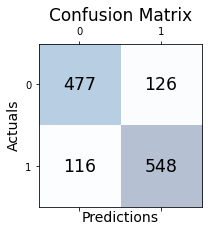

In [10]:
#Build confusion matrix
cm=confusion_matrix(ytest,pred)
fig, ax = plt.subplots(figsize=(3, 3))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('Actuals', fontsize=14)
plt.title('Confusion Matrix', fontsize=17)
plt.show()